# Lab 1 Machine Learning
### Bianca Caissotti di Chiusano (i6245461)

In [59]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

## Lab Task 4c)
We are firstly training decision trees on the diabetes data
So we read the CSV file.

In [60]:
data = pd.read_csv('diabetes.csv')

In [61]:
data

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,tested_negative
764,2,122,70,27,0,36.8,0.340,27,tested_negative
765,5,121,72,23,112,26.2,0.245,30,tested_negative
766,1,126,60,0,0,30.1,0.349,47,tested_positive


In [62]:
# output column (Vector) Y
Y = data['class']
# input matrix X
X = data.drop(['class'], axis = 1)

Starting from the One-Level decision tree: so the max_depth parameter of DecisionTreeClassifier is set to 1. This means that we are only training one layer of the decision tree.
We then randomly split the diabetes data into "training" and "test" data sets. Test_size is 0.34, because it is randomly selecting 66% of rows for training, and the rest for testing. 
We use this training data to train the classifier. Following that use the trained classifier to predict the output given the same training data (that was used to train). And calculate the accuracy score by comparing the trained output with the just calculated output Yp.

In [63]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.34, random_state=10)
clf = clf.fit(X_train,Y_train)
Yp = clf.predict(X_train)
acc = accuracy_score(Y_train, Yp)
print(acc)

0.7648221343873518


Now, more importantly, we want to see how good out trained clf is at predicting output for data that it has never seen, thus the test data.

In [66]:
# Do the same but for the test data
Yp = clf.predict(X_test)
acc = accuracy_score(Y_test, Yp)
print(acc)

0.7213740458015268


We can observe that the two calculated accuracies (for train and test data) are quite similar as we are only training a one-level decision trees.

Following, the same exact steps are applied, however this time for a multi-level decision tree, thus setting max_depth to None in our DecisionTreeClassifier.

In [67]:
# MULTI-LEVEL DECISION TREES
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = None)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.34, random_state=10)
clf = clf.fit(X_train,Y_train)
Yp = clf.predict(X_train)
acc = accuracy_score(Y_train, Yp)
print(acc)
Yp = clf.predict(X_test)
acc = acc = accuracy_score(Y_test, Yp)
print(acc)

1.0
0.732824427480916


We can now see that our accuracy score when using the training data is 1. This is because of the max_depth is not limited and all possible decisions for the training data can be satisfied. However, the accuracy score when using the test data did not change much, compared to when using one-level trees, because the tree was trained using the training data, thus not all decisions for the test data can be satisfies, even without any limit on the depth of the tree.

#### Training one-level and multi-level decision trees on the glass data
Same steps as above are repeated for the data in glass.csv

In [20]:
glass_data = pd.read_csv('glass.csv')
glass_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,class
0,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.00,'build wind float'
1,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.0,0.00,'vehic wind float'
2,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.00,'build wind float'
3,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.00,tableware
4,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.0,0.24,'build wind non-float'
...,...,...,...,...,...,...,...,...,...,...
209,1.51610,13.42,3.40,1.22,72.69,0.59,8.32,0.0,0.00,'vehic wind float'
210,1.51592,12.86,3.52,2.12,72.66,0.69,7.97,0.0,0.00,'build wind non-float'
211,1.51613,13.92,3.52,1.25,72.88,0.37,7.94,0.0,0.14,'build wind non-float'
212,1.51689,12.67,2.88,1.71,73.21,0.73,8.54,0.0,0.00,'build wind non-float'


In [23]:
Y_glass = glass_data['class']
X_glass = glass_data.drop(['class'], axis = 1)

clf_glass = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X_glass, Y_glass, test_size = 0.34, random_state=10)

# Accuracy Score Training data
clf_glass = clf_glass.fit(X_train,Y_train)
Yp = clf_glass.predict(X_train)
acc = accuracy_score(Y_train, Yp)
print(acc)

0.46099290780141844


In [24]:
# Accuracy Score Test data
Yp = clf_glass.predict(X_test)
acc = accuracy_score(Y_test, Yp)
print(acc)

0.4246575342465753


In [51]:
# Multi-Level
clf_glass = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = None)
X_train, X_test, Y_train, Y_test = train_test_split(X_glass, Y_glass, test_size = 0.34, random_state=10)
clf_glass = clf_glass.fit(X_train,Y_train)
Yp = clf_glass.predict(X_train)
# Accuracy Score Training data
acc = accuracy_score(Y_train, Yp)
print(acc)

1.0


In [52]:
# Accuracy Score Test data
Yp = clf_glass.predict(X_test)
acc = acc = accuracy_score(Y_test, Yp)
print(acc)

0.5616438356164384


## Lab Tasks 4d)

For Task 4d:
Estimate the accuracy rates of the resulting decision trees using the training set and hold-out validation. 
Plot the accuracy rates based on the training set and hold-out validation for min_samples_leaf from 1 to the size of the datasets with step of 5

In [45]:
# Arrays to store Accuracy scores at each time step for both data sets
acc_train_diabetes = []
acc_test_diabetes = []

acc_train_glass = []
acc_test_glass = []

# Function I called estimate. The decision tree is multi level. And the min_sample leaf depends on the time step
def estimate(X_train, X_test, Y_train, Y_test, num_leafs, acc_train, acc_test):
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = None, min_samples_leaf = num_leafs)
    clf = clf.fit(X_train,Y_train)
    
    Yp = clf.predict(X_train)
    acc = accuracy_score(Y_train, Yp)
    acc_train.append(acc)
    
    Yp = clf.predict(X_test)
    acc = accuracy_score(Y_test, Yp)
    acc_test.append(acc)

    
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.34, random_state=10)
X_train_glass, X_test_glass, Y_train_glass, Y_test_glass = train_test_split(X_glass, Y_glass, test_size = 0.34, random_state=10)

for i in range(1,data.shape[0]):
    estimate(X_train, X_test, Y_train, Y_test, i, acc_train_diabetes, acc_test_diabetes)
    i += 5

for i in range(1,glass_data.shape[0]):
    estimate(X_train_glass, X_test_glass, Y_train_glass, Y_test_glass, i, acc_train_glass, acc_test_glass)
    i += 5   


For both datasets, at each time step we call the estimate function. The min_sample_leaf changes from 1 to the size of the dataset with a time step of 5. Every accuracy score is appended to the array which is then plotted.

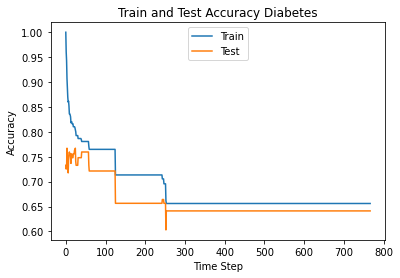

In [46]:
# x axis is the time step
# y axis is the accuracy
plt.title("Train and Test Accuracy Diabetes")
plt.ylabel("Accuracy")
plt.xlabel("Time Step")
plt.plot(acc_train_diabetes, label = "Train")
plt.plot(acc_test_diabetes, label = "Test")
plt.legend(loc = 'upper center')
plt.show()

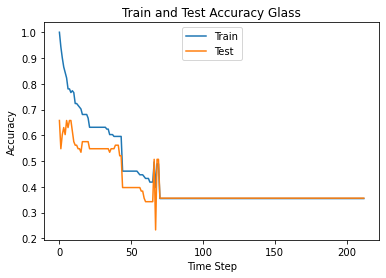

In [53]:
plt.title("Train and Test Accuracy Glass")
plt.ylabel("Accuracy")
plt.xlabel("Time Step")
plt.plot(acc_train_glass, label = "Train")
plt.plot(acc_test_glass, label = "Test")
plt.legend(loc = 'upper center')
plt.show()

In both graphs, we can observe that at the beginning the training data is predicted with a greater accuracy than with the testing data, because the min_sample_leafs is small but we are still working with a multi-level tree. However as the min_sample_leafs increases than the accuracy of the training data also decreases. 